# Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
#define the path of the main folder
path = r'/Users/gil/Downloads/World Happiness'

# Import dataset

In [4]:
#import combined_data_checked.csv
df_combined = pd.read_csv(os.path.join(path, 'Data', 'Prepared data', 'combined_data_checked_2.csv'), index_col = False)


In [5]:
df_combined.head()

,Unnamed: 0.1,Unnamed: 0,Country,Region,Year,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Government trust,Financial status,Government status,Health level
0,0,0,Switzerland,Western Europe,2015,1,7.6,1.4,1.4,0.9,0.7,0.3,0.4,Financially well-off,High government trust,Very healthy
1,1,1,Iceland,Western Europe,2015,2,7.6,1.3,1.4,1.0,0.6,0.4,0.1,Financially average,Low government trust,Very healthy
2,2,2,Denmark,Western Europe,2015,3,7.5,1.3,1.4,0.9,0.6,0.3,0.5,Financially average,High government trust,Very healthy
3,3,3,Norway,Western Europe,2015,4,7.5,1.5,1.3,0.9,0.7,0.4,0.4,Financially well-off,High government trust,Very healthy
4,4,4,Canada,North America,2015,5,7.4,1.3,1.3,0.9,0.6,0.5,0.3,Financially average,Average government trust,Very healthy


# 3. Data cleaning/wrangling

In [6]:
#drop column Unnamed 
df_combined = df_combined.drop(columns = ['Unnamed: 0.1'])

In [7]:
#drop column Unnamed 
df_combined = df_combined.drop(columns = ['Unnamed: 0'])

In [8]:
df_combined.columns

Index(['Country', 'Region', 'Year', 'Happiness Rank', 'Happiness Score',
       'Economy', 'Family', 'Health', 'Freedom', 'Generosity',
       'Government trust', 'Financial status', 'Government status',
       'Health level'],
      dtype='object')

In [9]:
df_combined.shape

(777, 14)

In [10]:
df_combined.describe()

,Year,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Government trust
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,776.000000
mean,2016.993565,78.416988,5.387001,0.919691,1.080438,0.611712,0.411840,0.219176,0.124871
std,1.417385,45.189163,1.127205,0.405136,0.330071,0.248665,0.156026,0.126940,0.114328
min,2015.000000,1.000000,2.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,39.000000,4.500000,0.600000,0.900000,0.400000,0.300000,0.100000,0.000000
50%,2017.000000,78.000000,5.300000,1.000000,1.100000,0.600000,0.400000,0.200000,0.100000
75%,2018.000000,117.000000,6.200000,1.200000,1.300000,0.800000,0.500000,0.300000,0.200000
max,2019.000000,158.000000,7.800000,2.100000,1.600000,1.100000,0.700000,0.800000,0.600000


In [11]:
# Check for missing values

df_combined.isnull().sum()

Country              0
Region               0
Year                 0
Happiness Rank       0
Happiness Score      0
Economy              0
Family               0
Health               0
Freedom              0
Generosity           0
Government trust     1
Financial status     0
Government status    0
Health level         0
dtype: int64

# 4. Exploring the data visually

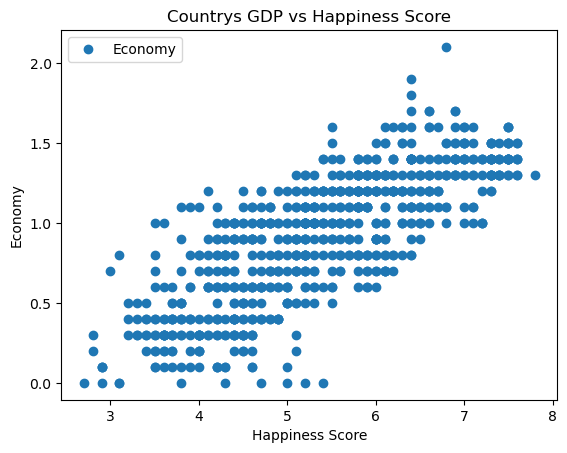

In [14]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_combined.plot(x = 'Happiness Score', y='Economy',style='o') 
plt.title('Countrys GDP vs Happiness Score')  
plt.xlabel('Happiness Score')  
plt.ylabel('Economy')  
plt.show()

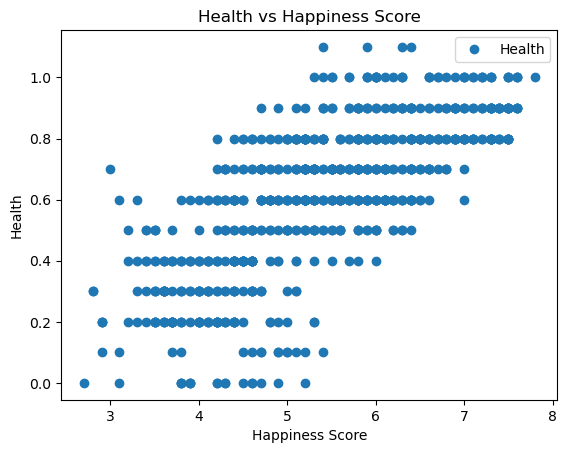

In [38]:
df_combined.plot(x = 'Happiness Score', y='Health',style='o') 
plt.title('Health vs Happiness Score')  
plt.xlabel('Happiness Score')  
plt.ylabel('Health')  
plt.show()

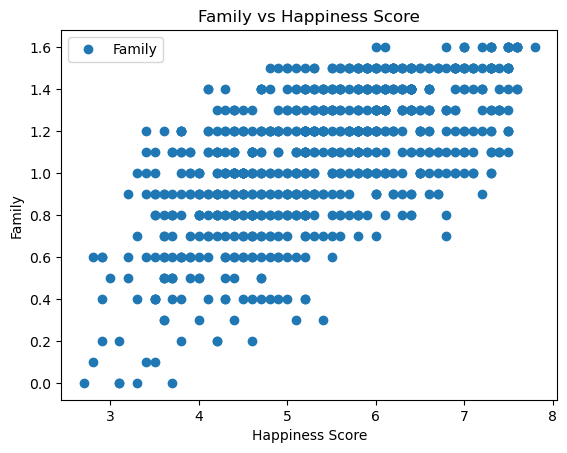

In [39]:
df_combined.plot(x = 'Happiness Score', y='Family',style='o') 
plt.title('Family vs Happiness Score')  
plt.xlabel('Happiness Score')  
plt.ylabel('Family')  
plt.show()

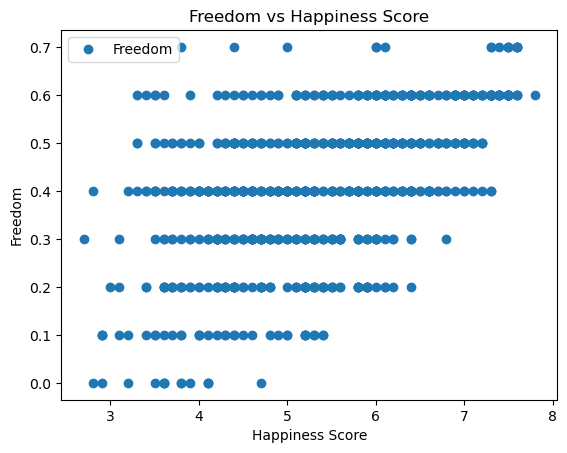

In [40]:
df_combined.plot(x = 'Happiness Score', y='Freedom',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Freedom vs Happiness Score')  
plt.xlabel('Happiness Score')  
plt.ylabel('Freedom')  
plt.show()

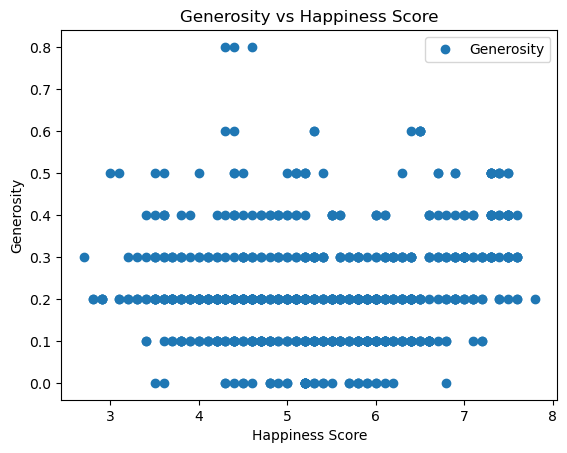

In [41]:
df_combined.plot(x = 'Happiness Score', y='Generosity',style='o')
plt.title('Generosity vs Happiness Score')  
plt.xlabel('Happiness Score')  
plt.ylabel('Generosity')  
plt.show()

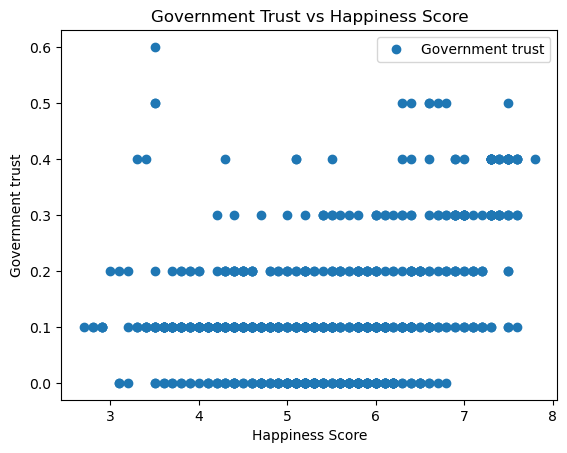

In [42]:
df_combined.plot(x = 'Happiness Score', y='Government trust',style='o') 
plt.title('Government Trust vs Happiness Score')  
plt.xlabel('Happiness Score')  
plt.ylabel('Government trust')  
plt.show()

# 5. Hypothesis: The better the country's economic situation, the happier the country is. 

# 6. Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable.

In [52]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_combined['Economy'].values.reshape(-1,1)
y = df_combined['Happiness Score'].values.reshape(-1,1)

In [53]:
X

array([[1.4],
       [1.3],
       [1.3],
       [1.5],
       [1.3],
       [1.3],
       [1.3],
       [1.3],
       [1.2],
       [1.3],
       [1.2],
       [1. ],
       [1.3],
       [1. ],
       [1.4],
       [1. ],
       [1.6],
       [1.3],
       [1.3],
       [1.4],
       [1.3],
       [1.4],
       [1. ],
       [1.5],
       [1.1],
       [1.3],
       [1.1],
       [1.7],
       [1.3],
       [1. ],
       [1.2],
       [1.1],
       [0.9],
       [1. ],
       [1.4],
       [1.2],
       [1.2],
       [1.3],
       [1.6],
       [1. ],
       [1.2],
       [0.8],
       [0.8],
       [0.6],
       [1.2],
       [1.3],
       [1.2],
       [0.9],
       [1.3],
       [1.2],
       [0.7],
       [0.6],
       [0.8],
       [1.1],
       [1.2],
       [1.2],
       [0.6],
       [0.9],
       [1. ],
       [1.1],
       [1.1],
       [1.1],
       [1.1],
       [1.1],
       [0.8],
       [1.2],
       [1.2],
       [0.9],
       [0.8],
       [1. ],
       [1. ],
      

In [45]:
y

array([[7.6],
       [7.6],
       [7.5],
       [7.5],
       [7.4],
       [7.4],
       [7.4],
       [7.4],
       [7.3],
       [7.3],
       [7.3],
       [7.2],
       [7.2],
       [7.2],
       [7.1],
       [7. ],
       [7. ],
       [6.9],
       [6.9],
       [6.9],
       [6.9],
       [6.8],
       [6.8],
       [6.8],
       [6.8],
       [6.8],
       [6.7],
       [6.6],
       [6.6],
       [6.6],
       [6.5],
       [6.5],
       [6.5],
       [6.5],
       [6.4],
       [6.3],
       [6.3],
       [6.3],
       [6.3],
       [6.3],
       [6.2],
       [6.1],
       [6.1],
       [6. ],
       [6. ],
       [6. ],
       [6. ],
       [6. ],
       [6. ],
       [6. ],
       [5.9],
       [5.9],
       [5.9],
       [5.9],
       [5.8],
       [5.8],
       [5.8],
       [5.8],
       [5.8],
       [5.8],
       [5.8],
       [5.8],
       [5.8],
       [5.7],
       [5.7],
       [5.7],
       [5.7],
       [5.6],
       [5.6],
       [5.6],
       [5.5],
      

# 7. Split the data into two sets: a training set and a test set.

In [46]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 8. Run a linear regression on the data.
First, fit the model you created to the training set.
Then, create a prediction for y on the test set.

In [47]:
# Create a regression object.

regression = LinearRegression()

In [48]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [49]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

# 9. Create a plot that shows the regression line on the test set.


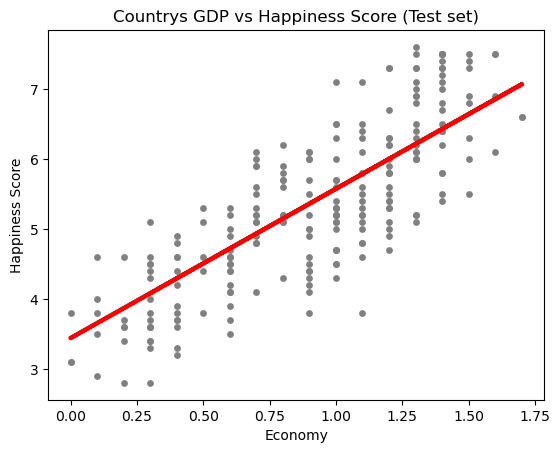

In [51]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Countrys GDP vs Happiness Score (Test set)')
plot_test.xlabel('Economy')
plot_test.ylabel('Happiness Score')
plot_test.show()

# 10. Write your own interpretation of how well the line appears to fit the data in a markdown cell. 

From a previous task, we know that the correlation coefficient is 0.78.
Here, we can see that the regression model doesn’t really cover all of our data points. There are some countries with a decent GDP, yet, they are less happy than countries with a lower GDP score. 

# 11. Check the model performance statistics—MSE and R2 score.


In [25]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [26]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.28146366]]
Mean squared error:  0.05720212550620644
R2 score:  0.6549344955141744


In [27]:
y_predicted

array([[0.41325913],
       [0.63843006],
       [0.91989372],
       [1.39838195],
       [0.91989372],
       [0.6102837 ],
       [0.69472279],
       [1.22950375],
       [0.41325913],
       [1.08877192],
       [1.22950375],
       [0.46955186],
       [0.4414055 ],
       [0.2725273 ],
       [0.83545462],
       [1.31394285],
       [1.14506465],
       [0.86360099],
       [0.66657643],
       [1.39838195],
       [1.22950375],
       [0.46955186],
       [0.66657643],
       [1.20135738],
       [1.25765012],
       [0.55399096],
       [0.66657643],
       [0.4414055 ],
       [1.48282105],
       [1.14506465],
       [0.91989372],
       [1.08877192],
       [0.38511277],
       [0.83545462],
       [0.89174736],
       [1.45467468],
       [0.83545462],
       [1.48282105],
       [0.97618646],
       [1.14506465],
       [1.20135738],
       [1.22950375],
       [0.6102837 ],
       [0.69472279],
       [1.45467468],
       [0.69472279],
       [0.83545462],
       [0.863

# 12. Compare the predicted y values with the actual y values in a dataframe.


In [54]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,3.6,4.081224
1,4.4,4.294430
2,5.4,5.573663
3,7.1,6.426486
4,5.4,6.426486
5,4.3,5.360458
6,4.6,4.081224
7,6.5,5.573663
8,3.6,4.081224
9,6.0,6.213280


In [55]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [56]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [57]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.13205621]]
Mean squared error:  0.4940997334701914
R2 score:  0.600096348359166


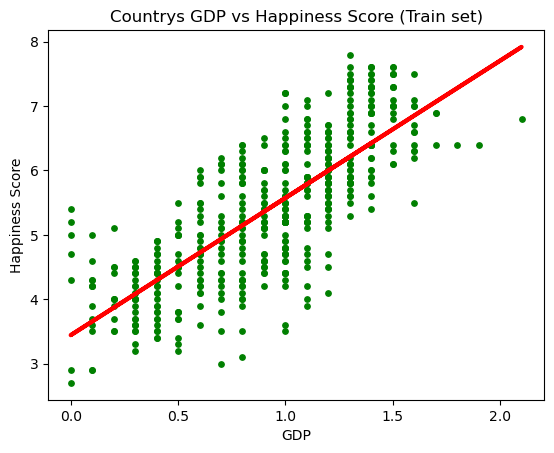

In [59]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Countrys GDP vs Happiness Score (Train set)')
plot_test.xlabel('GDP')
plot_test.ylabel('Happiness Score')
plot_test.show()

# 13. Include your thoughts on how well the model performed on the test set in a markdown cell.
Include any reflections you have on the impact of possible data bias.


The positive slope indicates a positive relationship (as GDP rises, so does Happiness Score, at a degree of 0.28).
The MSE is small, which indicates that regression seems to be a good model to represent this data.
The R2 score is also pretty high, which also indicates that the model explains the variance in the data quite well. 
However, I think the hypothesis that as GDP rises, so does Hapiness Score, is only partially true, as we can see that there are countries with low GDP, that are happier than other countries with higher GDPs. This means that there are other factors affecting country's happiness level that we need to explore.

In [60]:
df_combined.to_csv(os.path.join(path, 'Data', 'Prepared data', 'combined_data_checked_2.csv'))